# Hough Transform for Lane Detection

This notebook utilizes Hough Theory to detect lane lines for a self-driving car application

## Imports

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import cv2
import matplotlib.image as mpimg

## Handling the Test Image

Let's see what our image looks like along with its dimensions

(540, 956, 3)

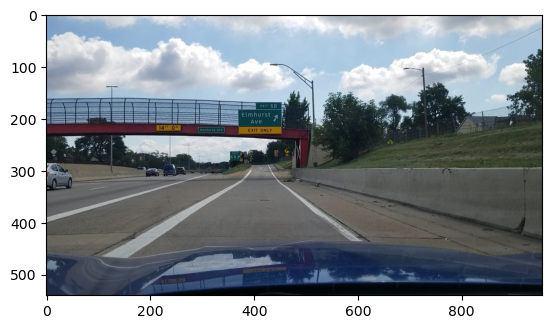

In [3]:
image = mpimg.imread('test_image.jpg')
plt.imshow(image)
image.shape

To make it easier to process, let's convert the image to grayscale

(540, 956)

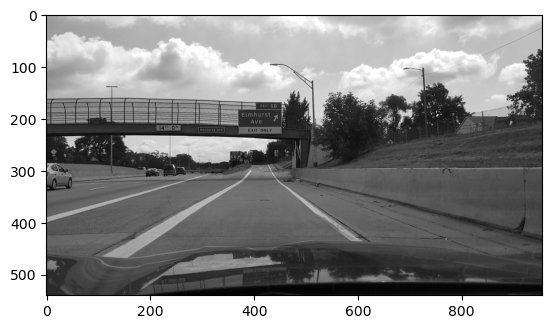

In [4]:
gray_image = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
plt.imshow(gray_image, cmap='gray')
gray_image.shape

Next, we'll apply some Gaussian Blurring and Canny edge detection

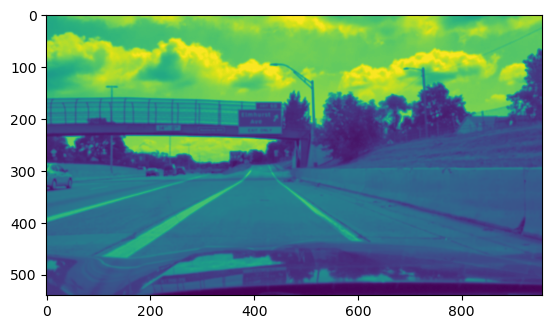

In [5]:
blurred_image = cv2.GaussianBlur(gray_image, (7, 7), 0)
plt.imshow(blurred_image)

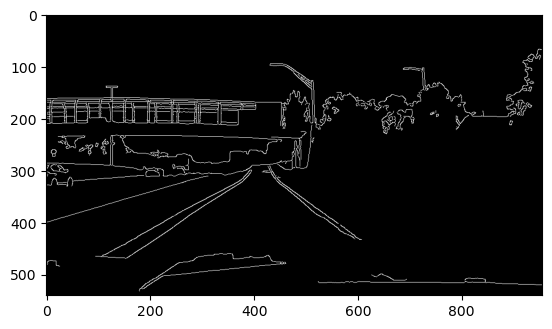

In [6]:
threshold_low = 10
threshold_high = 200

canny_image = cv2.Canny(blurred_image, threshold_low, threshold_high)
plt.imshow(canny_image, cmap='gray')

## Defining the Region of Interest

After processing our image we are now ready to define the region of interest where we expect the lane lines to appear

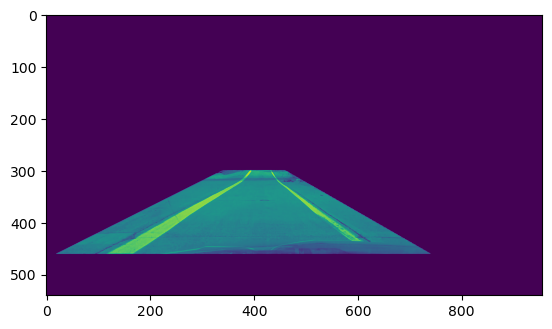

In [7]:
# Manually defining the region 
vertices = np.array([[(20, 460), (340, 300), (460, 300), (740, 460)]], dtype=np.int32)

# Create an image mask
mask = np.zeros_like(gray_image)
cv2.fillPoly(mask, vertices, 255)
masked_image = cv2.bitwise_and(gray_image, mask)
plt.figure()
plt.imshow(masked_image)

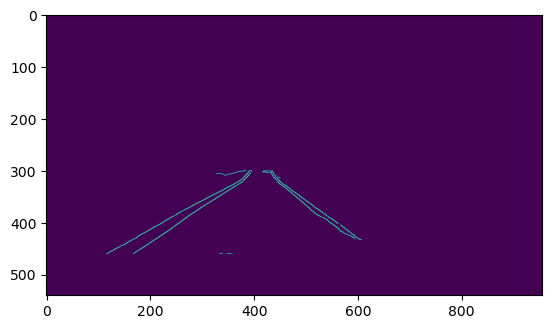

In [9]:
masked_image = cv2.bitwise_and(canny_image, mask)
plt.figure()
plt.imshow(masked_image)

## Determine Hough Lines

In [10]:
rho = 2            # distance resolution in pixels 
theta = np.pi/180  # angular resolution in radians 
threshold = 40     # minimum number of votes 
min_line_len = 100  # minimum number of pixels making up a line
max_line_gap = 50  # maximum gap in pixels between connectable line segments    
lines = cv2.HoughLinesP(masked_image, rho, theta, threshold, np.array([]), minLineLength=min_line_len, maxLineGap=max_line_gap)
    
# Create an empty black image
line_image = np.zeros((masked_image.shape[0], masked_image.shape[1], 3), dtype=np.uint8)
    
for line in lines:
    for x1,y1,x2,y2 in line:      
        cv2.line(line_image, (x1, y1), (x2, y2), [255, 0, 0], 20)
lines 

array([[[120, 459, 263, 377]],

       [[168, 460, 389, 311]],

       [[419, 301, 607, 433]],

       [[255, 382, 382, 317]],

       [[118, 460, 226, 400]],

       [[116, 460, 311, 352]]], dtype=int32)

## Overlay Original Image with Hough Lines

After determining Hough lines, we can overlay the original with them to display the lane detection

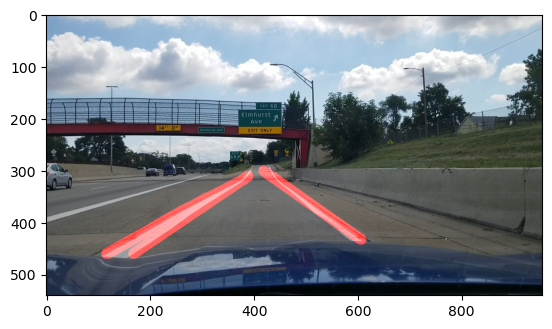

In [13]:
α = 1
β = 1
γ = 0    

# Resultant weighted image is calculated as follows: original_img * α + img * β + γ
Image_with_lines = cv2.addWeighted(image, α, line_image, β, γ)

plt.figure()
plt.imshow(Image_with_lines)
plt.savefig('lanes_detected')